# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> insira seu nome aqui </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

In [5]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [6]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [7]:
def Hemisferio(Latitude):
    if Latitude >= 0:
        return "Norte"
    if Latitude < 0:
        return "Sul"


In [8]:
df['Hemisferio'] = df.Latitude.apply(Hemisferio)

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

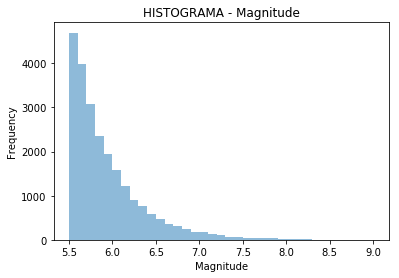

In [9]:
faixa = np.arange(5.5,9.1,0.1)
plot = df.Magnitude.plot.hist(bins=faixa,title='HISTOGRAMA - Magnitude',figsize=(6, 4), alpha=0.5)
plt.xlabel("Magnitude")

Conclusao:

Podemos perceber analisando o histograma que a frenquencia de terremotos de magnitude menor é bem maior do que a frequencia de terremotos com a magnitude maior.
________________________________________________________________________________________________________________________________

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [10]:
#Retorna Loc e Scale do banci de dados
expon.fit(df.Magnitude)

(5.4999999996710809, 0.38254864885090978)

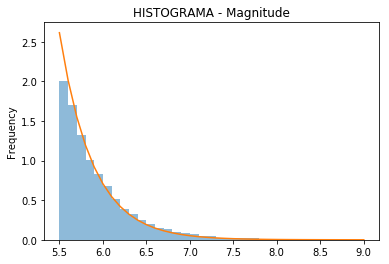

In [11]:
df.Magnitude.plot.hist(bins=faixa,title='HISTOGRAMA - Magnitude',figsize=(6, 4),normed=True, alpha=0.5)
plt.plot(faixa,expon.pdf(faixa, loc=5.4999999996710809, scale=0.38254864885090978))

Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [27]:
(pd.crosstab(df.Hemisferio,df.Type,rownames=['Hemisferio'], colnames=['Tipo'],normalize=True)*100).round(decimals=10).T

Hemisferio,Norte,Sul
Tipo,,
Earthquake,44.716385,54.514779
Explosion,0.008543,0.008543
Nuclear Explosion,0.627883,0.119597
Rock Burst,0.000000,0.004271


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [26]:
print(10469/(10469+12763))

0.4506284435261708


Explique o seu raciocínio

In [14]:
print('Pegamos a probabilidade ja obtida e estendemos ao longo do tempo asssim admitimos que a probabilidade de ocorrer é a mesma de ocorrer no futuro, assim pegamos a quantiade que ocorreram no norte e dividimos pela quantidade total') 

Pegamos a probabilidade ja obtida e estendemos ao longo do tempo asssim admitimos que a probabilidade de ocorrer é a mesma de ocorrer no futuro, assim pegamos a quantiade que ocorreram no norte e dividimos pela quantidade total


### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [15]:
(pd.crosstab(df.Hemisferio,df.Type,rownames=['Hemisferio'], colnames=['Tipo'])).round(decimals=10).T

Hemisferio,Norte,Sul
Tipo,,
Earthquake,10469,12763
Explosion,2,2
Nuclear Explosion,147,28
Rock Burst,0,1


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

In [30]:
# p=147/(10469+2+147)
# print(p)
p=0.627883/(44.716385+0.008543+0.627883)
print(p)

0.013844411981431536


## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

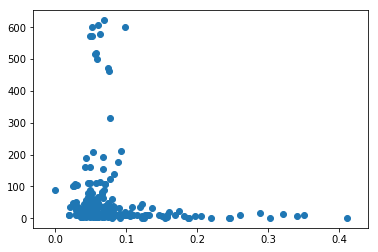

In [17]:
plt.scatter(df['Magnitude Error'], df['Depth'])
plt.show()

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [18]:
np.corrcoef(df['Magnitude Error'], df['Depth'])

array([[ nan,  nan],
       [ nan,   1.]])

Explique o que significa o valor da correlação calculada acima? 

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [19]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [20]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

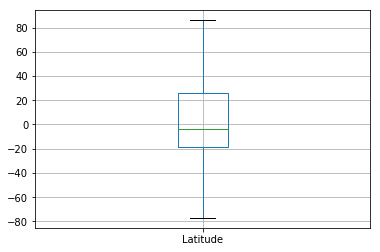

In [21]:
df.boxplot('Latitude')

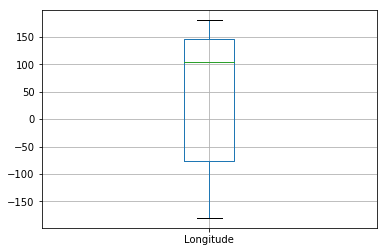

In [22]:
df.boxplot('Longitude')

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes
